In [1]:
#Choose which pre-trained model to apply
from tensorflow.keras.applications import MobileNetV2

In [2]:
#processors specific to pre-trained model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [3]:
#misc libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

Model settings

In [4]:
#'chop' off top of pre-trained model and set to untrainable
pre_trained_model = MobileNetV2(include_top=False, pooling='avg')
pre_trained_model.trainable = False

Data input settings

In [6]:
train_data_location = './Data/train/'
image_generator = ImageDataGenerator(preprocessing_function = preprocess_input,validation_split=0.2)

train_data = image_generator.flow_from_directory(train_data_location, target_size=(224,224),
                                                     subset='training')
validation_data = image_generator.flow_from_directory(train_data_location, target_size=(224,224),
                                                   subset='validation')


Found 4895 images belonging to 12 classes.
Found 1217 images belonging to 12 classes.


In [7]:
#set parameters required by Pre-trained model for pre-processing
#create test/validation split from dataset
train_data_location = '..data/train'
train_data = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(train_data_location, target_size(224,224))

NameError: name 'target_size' is not defined

In [ ]:
validation_data_location = '..data/validation'
validation_data = ImageDataGenerator(preprocessing_function = preprocess_input).flow_from_directory(validation_data_location, target_size(224,224))

In [8]:
#locate and indicate classes
class_mappings = train_data.class_indices
print(class_mappings)

{'Blouses': 0, 'Dresses': 1, 'Jackets & Coats': 2, 'Jeans': 3, 'Jumpers': 4, 'Polos': 5, 'Shirts': 6, 'Shorts': 7, 'Skirts': 8, 'Suits': 9, 'T-Shirts': 10, 'Trousers': 11}


Model Creation

In [9]:
model = Sequential()
model.add(pre_trained_model)
model.add(Dense(len(class_mappings), activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])#add more metrics if req

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 12)                15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


In [12]:
training_history = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
153/153 [==============================] - 326s 2s/step - loss: 1.5805 - accuracy: 0.4915 - val_loss: 1.0478 - val_accuracy: 0.6623
Epoch 2/5
153/153 [==============================] - 253s 2s/step - loss: 0.8955 - accuracy: 0.7030 - val_loss: 0.9993 - val_accuracy: 0.6565
Epoch 3/5
153/153 [==============================] - 233s 2s/step - loss: 0.7659 - accuracy: 0.7531 - val_loss: 0.8723 - val_accuracy: 0.7050
Epoch 4/5
153/153 [==============================] - 226s 1s/step - loss: 0.6661 - accuracy: 0.7821 - val_loss: 0.8699 - val_accuracy: 0.7058
Epoch 5/5
153/153 [==============================] - 2002s 13s/step - loss: 0.6063 - accuracy: 0.8053 - val_loss: 0.8407 - val_accuracy: 0.7149


In [13]:
model.save('../models/model.h5')

In [15]:
def plot_training_accuracy(training_history):
    plt.plot(training_history.history['accuracy'], label = 'training accuracy')
    plt.plot(training_history.history['val_accuracy'], label = 'validation accuracy')
    plt.legend
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

def plot_training_loss(training_history):
    plt.plot(training_history.history['accuracy'], label = 'training loss')
    plt.plot(training_history.history['val_accuracy'], label = 'validation loss')
    plt.legend
    plt.xlabel('epoch')
    plt.ylabel('loss')

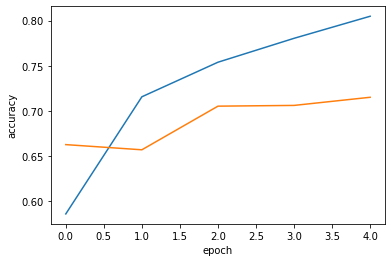

In [16]:
plot_training_accuracy(training_history)

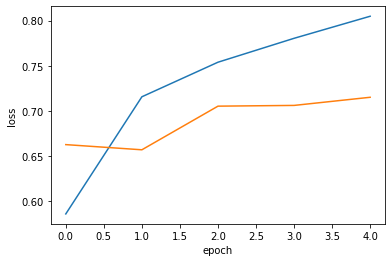

In [17]:
plot_training_loss(training_history)

Model Testing

In [18]:
alessandra = load_model('../models/model.h5')

In [20]:
sartorial = image.load_img("./Data/Dress1.jpg", target_size=(224, 224)
sartorial = image.img_to_array(sartorial)
sartorial = np.expand_dims(sartorial ,axis=0)
imgplot = plt.imshow(sartorial)
print(sartorial.shape)

SyntaxError: invalid syntax (<ipython-input-20-46158046a8c9>, line 2)

In [ ]:
sartorial = pre_process_input(sartorial)

In [ ]:
predictions = model.predict(sartorial)
predicted_class = np.argmax(predictions)
print(predicted_class)

In [ ]:
#from imagenet class predictor
print("Top predictions for this image:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(f"Prediction: {name} - {likelihood:2f}")